In [70]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [12]:
user_data = pd.read_csv('user_data.csv', encoding='windows-1251', sep=',')
log = pd.read_csv('logs.csv', sep=',')

In [21]:
log

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [15]:
log.platform.nunique()

3

In [33]:
log.query('success == True').groupby('client').agg({'success': 'count'}).sort_values('success', ascending=False).head(10)

,success
platform,
phone,2019
computer,1090
tablet,180


In [14]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [34]:
df = user_data.merge(log, how='inner', on='client')

In [35]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [37]:
df.query('premium == True').groupby('platform').agg({'success': 'count'}).sort_values('success', ascending=False).head(10)

,success
platform,
phone,246
computer,150
tablet,24


C:\Users\HuaweiNB421\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HuaweiNB421\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


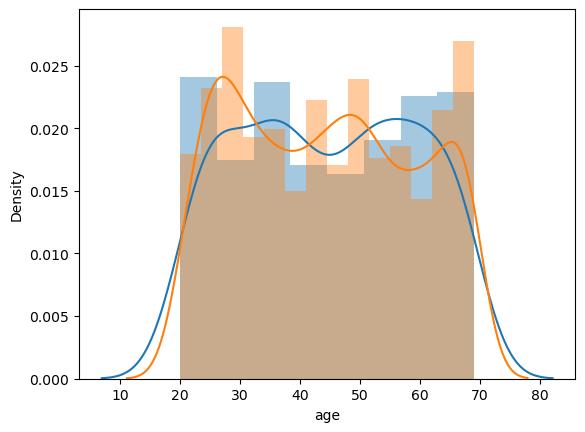

In [42]:
ax = sns.distplot(df.query('premium == True').age)
ax = sns.distplot(df.query('premium == False').age)


C:\Users\HuaweiNB421\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


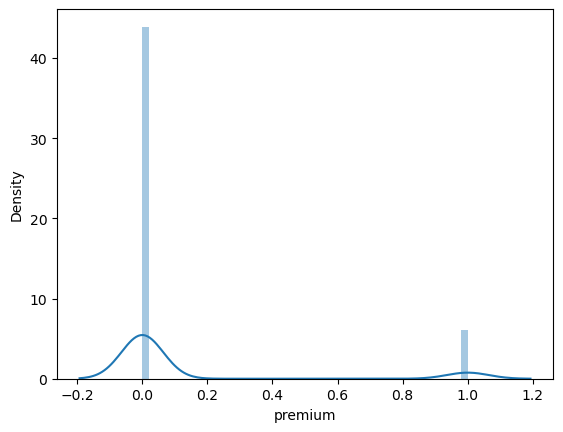

In [58]:
res = df.query('success == True').groupby('client', as_index=False).agg({'success': 'count'}).sort_values('success', ascending=False)
res

,client,success
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
...,...,...
702,34642,1
701,34640,1
700,34630,1
699,34615,1


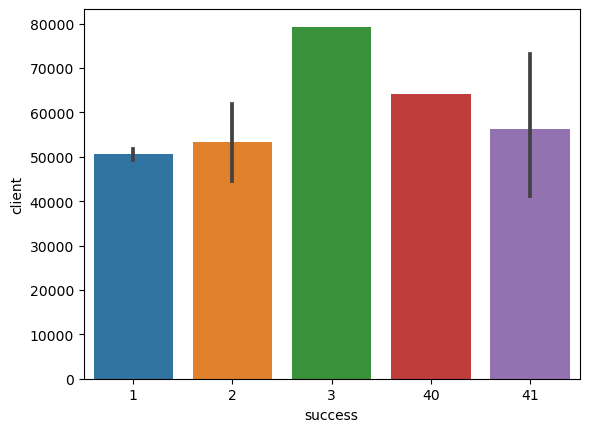

In [56]:
ax4 = sns.barplot(x='success', y='client', data=res)

C:\Users\HuaweiNB421\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='success', ylabel='count'>

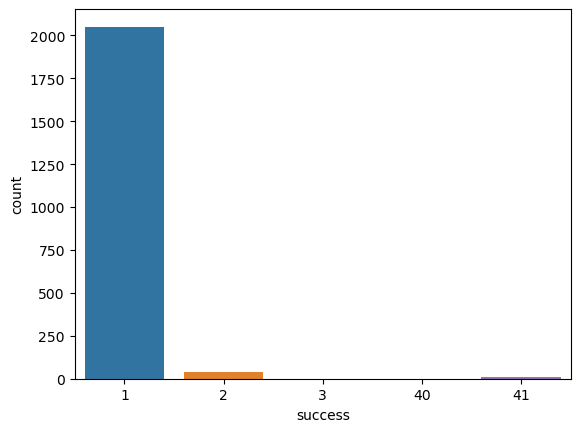

In [59]:
sns.countplot(res['success'])

In [80]:
res1 = df.query('platform == "computer" and success == True').groupby(['age'], as_index=False).agg({'success': 'count'}).sort_values('success', ascending=False)
res1

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26
4,24,26
49,69,24
45,65,23
32,52,22
34,54,22


<AxesSubplot:xlabel='age', ylabel='success'>

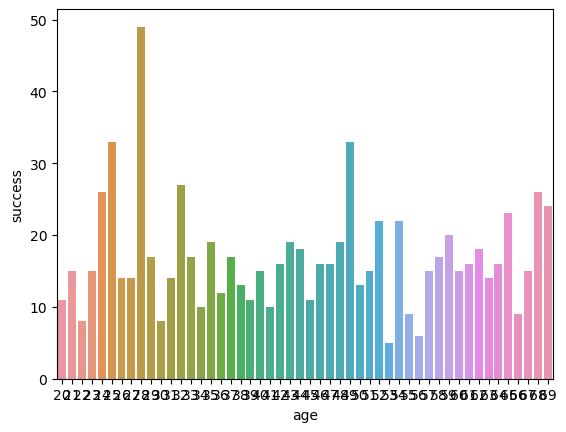

In [83]:
plt.figure.Figure( figsize =(12,8) )
sns.barplot(x='age', y='success', data=res1)